In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/kaggle/taitanic/gender_submission.csv")

train = pd.read_csv("/content/drive/MyDrive/kaggle/taitanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/kaggle/taitanic/test.csv")
print(train.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)

    accuracy = accuracy_score(y_test , pred)

    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)

    f1 = f1_score(y_test,pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):

    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("/content/drive/MyDrive/kaggle/taitanic/train.csv")
predict_df = pd.read_csv('/content/drive/MyDrive/kaggle/taitanic/test.csv')
gender_submission_df = pd.read_csv("/content/drive/MyDrive/kaggle/taitanic/gender_submission.csv")

# 알파벳 뒤에 붙는 숫자 값은 무시하고 Alphabet만 가져오는 전략을 선택
train_df['Cabin'] = train_df['Cabin'].str[:1]

def get_category_age(age):
    cat = ''
    if age <= -1: cat = 0
    elif age <= 5: cat = 1
    elif age <= 12: cat = 2
    elif age <= 18: cat = 3
    elif age <= 25: cat = 4
    elif age <= 35: cat = 5
    elif age <= 60: cat = 6
    else: cat = 7

    return cat

group_names = [0, 1, 2, 3, 4, 5, 6, 7]
train_df['Age_range'] = train_df['Age'].apply(lambda x : get_category_age(x))

def get_category_fare(fare):
    cat = ''
    if fare <= 0: cat = 0
    elif fare <= 10: cat = 1
    elif fare <= 20: cat = 2
    elif fare <= 30: cat = 3
    elif fare <= 40: cat = 4
    elif fare <= 50: cat = 5
    elif fare <= 60: cat = 6
    else: cat = 7

    return cat

group_names = [0, 1, 2, 3, 4, 5, 6, 7]
train_df['Fare_range'] = train_df['Fare'].apply(lambda x : get_category_fare(x))

# 불필요한 특성, null 값 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket', 'Age', 'Fare'], axis=1, inplace=True)

    y = df['Survived']
    df = df.drop('Survived', axis=1, inplace=False)
    return df, y

def fillna(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    return df
# predict_df에서 사용
def drop_features_update(df):
    df.drop(['PassengerId','Name','Ticket', 'Age', 'Fare'], axis=1, inplace=True)
    return df

train_df = fillna(train_df)
X, y = drop_features(train_df)


# 라벨 인코딩 구현
# Sex
def get_category_sex(sex):
    cat = ''
    if sex == "male": cat = 0
    else: cat = 1
    return cat

group_names = [0, 1]
X['Sex'] = X['Sex'].apply(lambda x : get_category_sex(x))

# Embarked
def get_category_embarked(embarked):
    cat = ''
    if embarked == "S": cat = 0
    elif embarked == "C": cat= 1
    elif embarked == "Q": cat= 2
    else: cat = 3
    return cat

group_names = [0, 1, 2, 3]
X['Embarked'] = X['Embarked'].apply(lambda x : get_category_embarked(x))

# Cabin
def get_category_cabin(cabin):
    cat = ''
    if cabin == "A": cat = 0
    elif cabin == "B": cat= 1
    elif cabin == "C": cat= 2
    elif cabin == "D": cat= 3
    elif cabin == "E": cat= 4
    elif cabin == "F": cat= 5
    elif cabin == "G": cat= 6
    elif cabin == "N": cat= 7
    else: cat = 8
    return cat

group_names = [0, 1, 2, 3, 4, 5, 6, 7, 8]
X['Cabin'] = X['Cabin'].apply(lambda x : get_category_cabin(x))

print(X.head())

from sklearn.preprocessing import StandardScaler

# # 표준화 => 2차원 데이터
# sc = StandardScaler()
# X = sc.fit_transform(X)
# X[1]

   Pclass  Sex  SibSp  Parch  Cabin  Embarked  Age_range  Fare_range
0       3    0      1      0      7         0          4           1
1       1    1      1      0      2         1          6           7
2       3    1      0      0      7         0          5           1
3       1    1      1      0      2         0          5           6
4       3    0      0      0      7         0          5           1


In [13]:
predict_df['Age_range'] = predict_df['Age'].apply(lambda x : get_category_age(x))

predict_df['Fare_range'] = predict_df['Fare'].apply(lambda x : get_category_fare(x))

predict_df = fillna(predict_df)
predict_df = drop_features_update(predict_df)

predict_df['Sex'] = predict_df['Sex'].apply(lambda x : get_category_sex(x))
predict_df['Embarked'] = predict_df['Embarked'].apply(lambda x : get_category_embarked(x))

predict_df['Cabin'] = predict_df['Cabin'].str[:1]
predict_df['Cabin'] = predict_df['Cabin'].apply(lambda x : get_category_cabin(x))

print(predict_df.head(3))

# predict_df = sc.transform(predict_df)
# predict_df[1]

   Pclass  Sex  SibSp  Parch  Cabin  Embarked  Age_range  Fare_range
0       3    0      0      0      7         2          5           1
1       3    1      1      0      7         0          6           1
2       2    0      0      0      7         2          7           1


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

In [15]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, early_stopping_rounds=100, eval_metric='logloss')

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
# 다중 분류 문제에서는 'multi_logloss'가 적합 / 회귀 문제에서는 'rmse', 'mae', 'mse' 등이 주로 사용
xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])
y_pred = xgb_clf.predict(X_test)

# 오차 행렬
cm = confusion_matrix(y_test, y_pred)
print(cm)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score), "\n")

xgb_f1_score = f1_score(y_test, y_pred)
print('F1 Score: {0:.4f}'.format(xgb_f1_score))

[0]	validation_0-logloss:0.65163	validation_1-logloss:0.57158
[1]	validation_0-logloss:0.63006	validation_1-logloss:0.55456
[2]	validation_0-logloss:0.61046	validation_1-logloss:0.53908
[3]	validation_0-logloss:0.59258	validation_1-logloss:0.52499
[4]	validation_0-logloss:0.57624	validation_1-logloss:0.51214
[5]	validation_0-logloss:0.56125	validation_1-logloss:0.50039
[6]	validation_0-logloss:0.54749	validation_1-logloss:0.48966
[7]	validation_0-logloss:0.53482	validation_1-logloss:0.47981
[8]	validation_0-logloss:0.52322	validation_1-logloss:0.47182
[9]	validation_0-logloss:0.51245	validation_1-logloss:0.46364
[10]	validation_0-logloss:0.50240	validation_1-logloss:0.45749
[11]	validation_0-logloss:0.49310	validation_1-logloss:0.45064
[12]	validation_0-logloss:0.48445	validation_1-logloss:0.44546
[13]	validation_0-logloss:0.47636	validation_1-logloss:0.44058
[14]	validation_0-logloss:0.46889	validation_1-logloss:0.43637
[15]	validation_0-logloss:0.46186	validation_1-logloss:0.43136
[1

In [16]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색.
# hp.uniform 균일 분포(Uniform Distribution)에서 하이퍼파라미터 값을 샘플링
# 균일 분포란 특정 구간 내에서 모든 값이 동일한 확률을 가지는 확률 분포를 말합니다. 즉, 어떤 값이 선택될 확률이 균일하게 분포되어 있다.
# [0.5, 0.95] 구간 내에서 균일하게 분포된 값을 'colsample_bytree' 하이퍼파라미터에 대한 후보 값으로 샘플링 = 0.5와 0.95 사이의 값들을 후보로 고려
xgb_search_space = {'max_depth': hp.quniform('max_depth', 2, 15, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [18]:
from sklearn.model_selection import KFold

# 목적 함수 설정.
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100,
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'],
                            early_stopping_rounds=30,
                            eval_metric='logloss')

    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []

    # 5개 k-fold방식 적용
    kf = KFold(n_splits=5)

    # X_train을 다시 학습과 검증용 데이터로 분리
    # X_train 데이터에 대한 학습 인덱스(tr_index)와 검증 인덱스(val_index)를 얻는다.
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1 * np.mean(roc_auc_list)

In [19]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials,
            rstate=np.random.default_rng()
           )

print('best:', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[34]	validation_0-logloss:0.36287	validation_1-logloss:0.42413
[35]	validation_0-logloss:0.36224	validation_1-logloss:0.42382
[36]	validation_0-logloss:0.36109	validation_1-logloss:0.42594
[37]	validation_0-logloss:0.36016	validation_1-logloss:0.42541
[38]	validation_0-logloss:0.35893	validation_1-logloss:0.42687
[39]	validation_0-logloss:0.35821	validation_1-logloss:0.42622
[40]	validation_0-logloss:0.35707	validation_1-logloss:0.42526
[41]	validation_0-logloss:0.35604	validation_1-logloss:0.42371
[42]	validation_0-logloss:0.35556	validation_1-logloss:0.42291
[43]	validation_0-logloss:0.35475	validation_1-logloss:0.42379
[44]	validation_0-logloss:0.35428	validation_1-logloss:0.42411
[45]	validation_0-logloss:0.35389	validation_1-logloss:0.42327
[46]	validation_0-logloss:0.35351	validation_1-logloss:0.42419
[47]	validation_0-logloss:0.35314	validation_1-logloss:0.42312
[48]	validation_0-logloss:0.35271	validation_1-logloss:0.42285
[49]	validation_0-l

In [23]:
print(best)

# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행. 33분 걸림
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'], 5))

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행.
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

hyper_xgb_proba = xgb_clf.predict_proba(X_test)[:,1]
hyper_xgb_pred = xgb_clf.predict(X_test)

xgb_roc_score = roc_auc_score(y_test, hyper_xgb_proba)
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))


xgb_f1_score = f1_score(y_test, hyper_xgb_pred)
print('F1 Score: {0:.4f}'.format(xgb_f1_score))

{'colsample_bytree': 0.5030542825657603, 'learning_rate': 0.17431511544707046, 'max_depth': 9.0, 'min_child_weight': 5.0}
[0]	validation_0-auc:0.84291	validation_1-auc:0.84681


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.84982	validation_1-auc:0.86375
[2]	validation_0-auc:0.86595	validation_1-auc:0.82920
[3]	validation_0-auc:0.86279	validation_1-auc:0.81486
[4]	validation_0-auc:0.86731	validation_1-auc:0.82464
[5]	validation_0-auc:0.87493	validation_1-auc:0.79922
[6]	validation_0-auc:0.87476	validation_1-auc:0.81226
[7]	validation_0-auc:0.87850	validation_1-auc:0.80183
[8]	validation_0-auc:0.88343	validation_1-auc:0.78488
[9]	validation_0-auc:0.88522	validation_1-auc:0.77705
[10]	validation_0-auc:0.88916	validation_1-auc:0.77575
[11]	validation_0-auc:0.89272	validation_1-auc:0.75359
[12]	validation_0-auc:0.89324	validation_1-auc:0.76662
[13]	validation_0-auc:0.89426	validation_1-auc:0.75619
[14]	validation_0-auc:0.89480	validation_1-auc:0.75489
[15]	validation_0-auc:0.89612	validation_1-auc:0.74316
[16]	validation_0-auc:0.89666	validation_1-auc:0.74185
[17]	validation_0-auc:0.89613	validation_1-auc:0.73924
[18]	validation_0-auc:0.89554	validation_1-auc:0.73794
[19]	validation_0-a

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

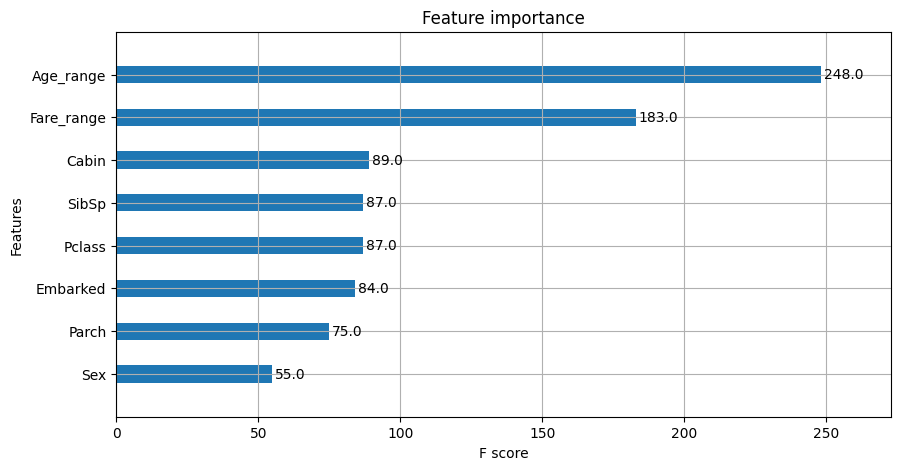

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10, 5))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

In [25]:
hyper_best_pred = xgb_clf.predict(X_test)
hyper_best_proba = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , hyper_best_pred, hyper_best_proba)

오차 행렬
[[101   9]
 [ 28  41]]
정확도: 0.7933, 정밀도: 0.8200, 재현율: 0.5942,    F1: 0.6891, AUC:0.8788


In [27]:
predict_titanic_pred_xgb_hyperopt = xgb_clf.predict(predict_df)
print('예측값 10개만 표시:',predict_titanic_pred_xgb_hyperopt[:10], "\n")

gender_submission_df['Survived'] = predict_titanic_pred_xgb_hyperopt
gender_submission_df.to_csv('titanic_submission_xgb_hyperopt.csv',index=False)
gender_submission_df

예측값 10개만 표시: [0 0 0 0 0 0 1 0 1 0] 



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
